In [858]:
import pandas as pd
import re
import numpy as np
import pycountry
pd.set_option('display.max_rows', None)
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

<hr style='color:white;'>
<p style='color:orange;font-size:20px;text-align:center;'>Data Cleansing</p>
<hr style='color:white;'>

In [829]:
df = pd.read_csv('C:\\csv-data-collect\\job-data.csv',encoding='latin')

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>DUPLICATES</p>
<hr style='color:#BA704F;'>

In [830]:
df.duplicated().sum()

202

In [831]:
df.drop_duplicates(inplace=True)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Salary</p>
<hr style='color:#BA704F;'>

In [832]:
df['Salary'].replace(np.nan, "0",inplace=True)
#df.loc[df['Salary'] == "0"]

In [833]:
df.drop(df.loc[(df['Salary'] == 0) & (df['Job Type'] != 'Internship')].index,inplace=True)

In [834]:
def ConvertToIntger(string):
    Money_pattern = re.compile("["
                           u"GBP"
                           u"EUR"
                           u"K"
                           u"+"
                           u"*"
                           "]+"
                           , flags=re.UNICODE)
    return int(Money_pattern.sub(r'', string)) * 1000

df['Salary'] = df['Salary'].apply(ConvertToIntger)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Company</p>
<hr style='color:#BA704F;'>

In [835]:
df.drop(df.loc[df['Company'].isna()].index,inplace=True)

In [836]:
df.loc[df['Company'].isna()]

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities


<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Experience level</p>
<hr style='color:#BA704F;'>

In [837]:
df['Experience level'].isna().sum()

227

In [838]:
df['Experience level'].fillna('not specified',inplace=True)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Requirment of the company</p>
<hr style='color:#BA704F;'>

In [839]:
def GetJobsName(text):
    return text.split(',')
Job_name_Ge_0 = []
for x in df['Requirment of the company '].apply(GetJobsName):
    for y in x:
        Job_name_Ge_0.append(y)

Job_name_df = pd.DataFrame(Job_name_Ge_0)
Job_name_df.rename(columns={0:"Requirment of the company"},inplace=True)
Indexies = Job_name_df.loc[Job_name_df['Requirment of the company'] ==''].index
Job_name_df.drop(Indexies,inplace=True)

Job_name_df['Requirment of the company'].value_counts()

Requirment of the company
Computer Science         1087
Engineering              1013
AWS                       815
Architecture              728
Agile                     562
Big Data                  559
Data analysis             553
Azure                     505
Machine Learning          488
Business Intelligence     429
Data Analytics            385
APIs                      354
Excel                     323
Data pipelines            298
Python                    283
Consulting                283
Airflow                   281
Data visualization        280
Deep Learning             273
Data management           249
Data quality              249
Finance                   209
BigQuery                  205
CI/CD                     191
ETL                       183
Mathematics               182
Data Mining               182
Databricks                178
Economics                 175
Computer Vision           174
Data governance           162
Banking                   157
Research      

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Job Title</p>
<hr style='color:#BA704F;'>

In [840]:
job__names = {
    "Data Science":[
        "Research Scientist",
        "Statistics and Probability",
        "Applied Scientist",
        "Decision Scientist"
    ],
    "Data engineer":[
        "Data Engineer Scientist",
        "Data Engineer",
        "IT Data Engineer",
    ],
    "Data analysis":[
        "Data Developer",
        "Data analysis",
        "Insight Analyst",
        "Data Analyst",
        "Marketing Analytics",
        "DB/ETL Developer",
        "Développeur ETL", 
        "Business Intelligence",
        "BI Developer",
        "BI Analyst"
    ],
    "AI":[
        "AI Engineer"
        "Principal Product Marketing Manager, AI & Mach",
        "Lead Machine Learning Engineer",
        "Machine Learning",
        "AI/ML",
        "ML Engineer",
        "Natural Language Processing",
        "MLOps Engineer",
        "NLP Scientist",
        "AI Product Owner",
        "ChatGPT Consultant",
        "AI Product Owner",
        "Computer Vision"
    ],
    "Big Data":[
        "Big Data Engineer",
        "Big Data",
        "Senior Big Data",
        "PySpark",
        "Cloud storage",
        "Cloud Data",
        "Cloud Engineer",
        "DevOps Engineer",
        "Technical Architect Databricks",
        "Data Modeler"
    ],
    "Developer":[
        "React Native",
        "HTML Developer"
        "HTML"
    ]
}

In [841]:
def find_job_title(text):
    Best_matched = None
    Best__Score = 0

    for job__name in job__names:
        for x in job__names[job__name]:
            score = fuzz.WRatio(text,x)
            if score > Best__Score:
                Best__Score = score
                Best_matched = job__name
    if Best__Score >= 86:
        return Best_matched
    else:
        return text


df['Job Title'] = df['Job Title'].apply(find_job_title)

<hr style='color:white;'>
<p style='color:orange;font-size:20px;text-align:center;'> Data analysis & visualization</p>
<hr style='color:white;'>

<hr style='color:#BA704F;'>
<u style='color:#6C3428;font-size:20px;text-decoration: none;'>
  <li>identify the key trends in the job market for AI, DS, and Big Data?</li>
  <li>the most demanded skills and the most common job titles in these fields?</li>
  <li>How do you analyze the differences and similarities between job opportunities in AI, DS, and Big Data?</li>
</u>
<hr style='color:#BA704F;'>

<Axes: xlabel='Job Title'>

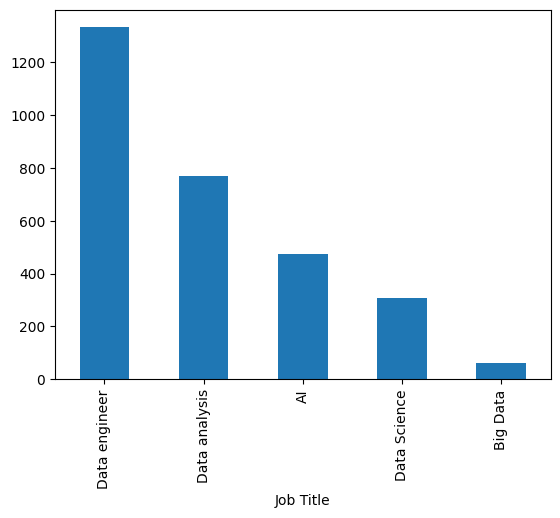

In [842]:
df['Job Title'].value_counts().sort_values(ascending=False).head().plot(kind = 'bar')

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>The highest paid domains.</p>
<hr style='color:#BA704F;'>

<Axes: >

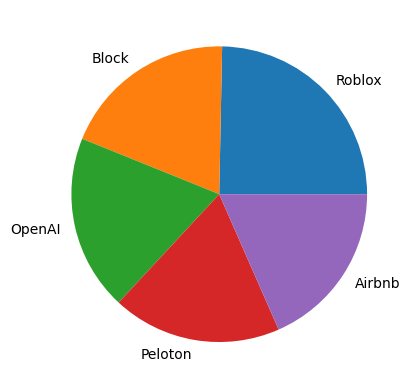

In [868]:
df.groupby('Company').apply(lambda x:x['Salary'].max()).sort_values(ascending=False).head().plot.pie()
# Check The Func working (Testing).
# df.loc[df['Job Title'] == 'Data analysis']['Salary'].max()

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Job Type Graph</p>
<hr style='color:#BA704F;'>

([<matplotlib.patches.Wedge at 0x24f5e764c10>,
 [Text(-1.096320269461012, 0.08989920338320195, 'Full Time'),
  Text(1.0957327614935846, -0.09679729019783234, 'Internship'),
  Text(1.0999782140093104, -0.0069230560367338715, 'Part Time')])

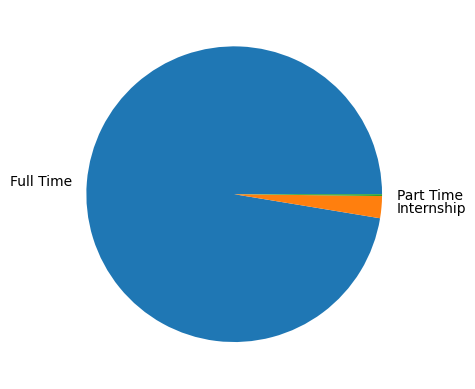

In [866]:
labels = df['Job Type'].value_counts().reset_index()['Job Type']
sizes = df['Job Type'].value_counts().reset_index()['count']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

<hr style='color:white;'>
<p style='color:orange;font-size:20px;text-align:center;'> Data <b><i>Modeling</i></b> & <b><i>Storage</i></b></p>
<hr style='color:white;'>

<hr style='color:#BA704F;'>
<u style='color:crimson;font-size:20px;text-decoration: none;'>
  <li>Entity-Relationship Model (ERM):</li>
  <li>Entity-Relationship Diagram (ERD):</li>
  <li>Insert into the database:</li>
</u>
<hr style='color:#BA704F;'>